1. K Maens
1. 변합, 군집
3. DBSCAN

In [1]:
import mglearn

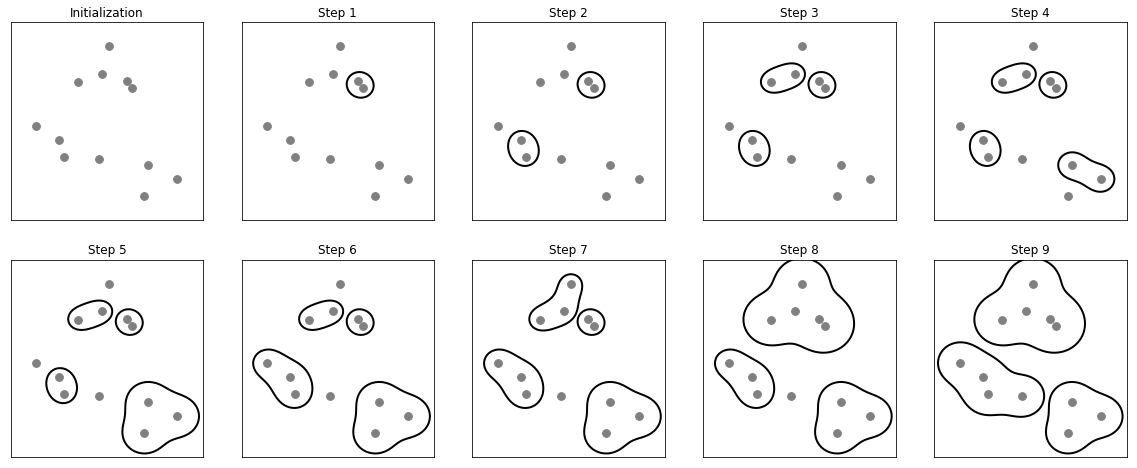

In [2]:
mglearn.plots.plot_agglomerative_algorithm() # 가장 가까운것부터 묶는다.

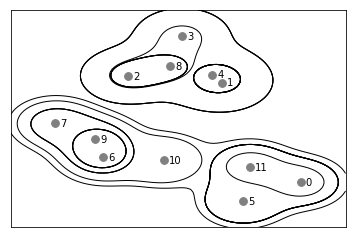

In [4]:
mglearn.plots.plot_agglomerative()

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [8]:
x, y = make_blobs() #실습용 데이터셋
x.shape, y.shape

((100, 2), (100,))

In [12]:
model = AgglomerativeClustering(n_clusters=3)

In [13]:
p = model.fit_predict(x)

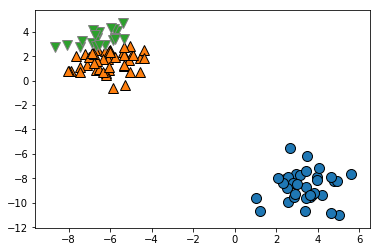

In [16]:
mglearn.discrete_scatter(x[:,0],x[:,1], p)

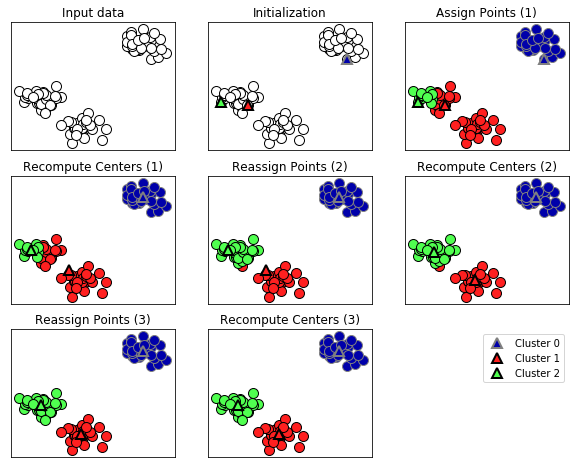

In [17]:
mglearn.plots.plot_kmeans_algorithm()

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


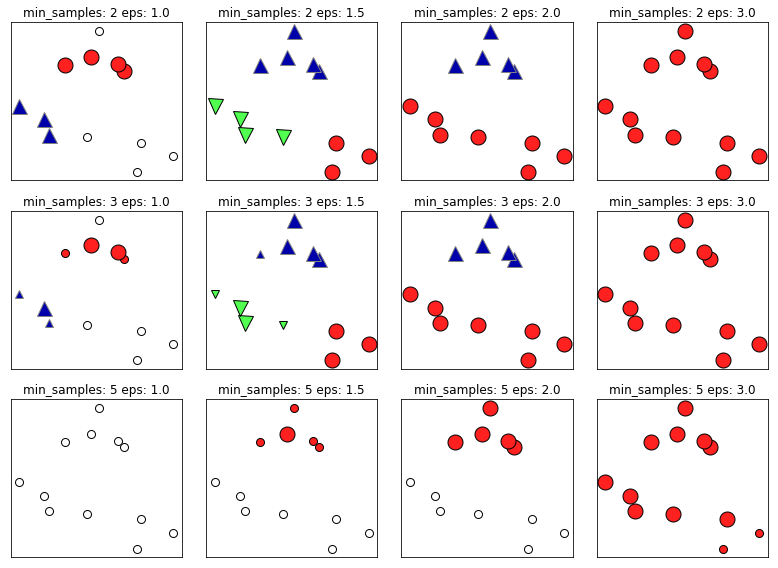

In [18]:
mglearn.plots.plot_dbscan() # 샘플들과의 거리에 따라서 묶는다(eps 거리)

In [19]:
from sklearn.cluster import DBSCAN

In [41]:
p = DBSCAN(eps=2, min_samples=5).fit_predict(x) # k 개를 정해주지 않습니다. , min_samples : 클러스터가 될 수 있는 최소 샘플, eps : 샘플들간의 거리

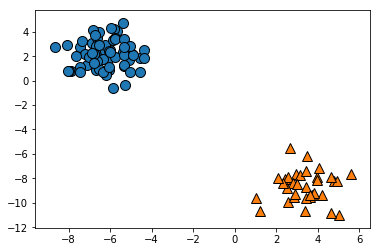

In [42]:
mglearn.discrete_scatter(x[:,0],x[:,1], p)

bank marketing -포르투갈에서 은행이 고객에게 예금 상품을 전화 홍보, 결과를 예측
- 3가지 클러스터링 방식으로 고객들을 클러스터링하세요
- 결정 트리(교사학습)
고객에서 전화를 걸어 상품을 홍보하라는 임무를 받아습니다. 가능하면 상품에 가입해줄만한 사람에게 연락을 하고 싶습니다. 상품에 가입해줄 착한 고객을 어떻게 찾으면 좋을까요?

In [43]:
import mglearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd


In [46]:
df = pd.read_csv('bank/bank.csv',sep=';')

In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [49]:
(df['y']=='yes').mean()

0.11523999115239991

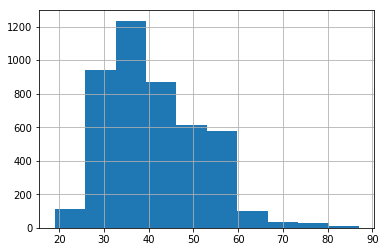

In [54]:
df['age'].hist()

In [52]:
df.isna().sum().sum()

0

In [55]:
j= df['job']

In [56]:
j.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

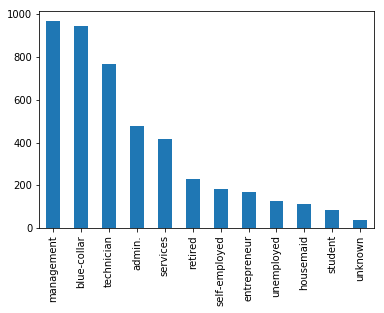

In [57]:
j.value_counts().plot.bar()

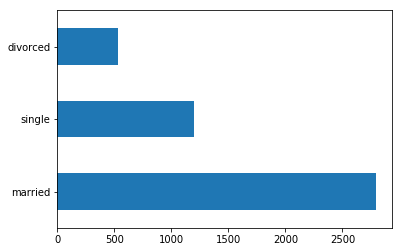

In [59]:
df.marital.value_counts().plot.barh()

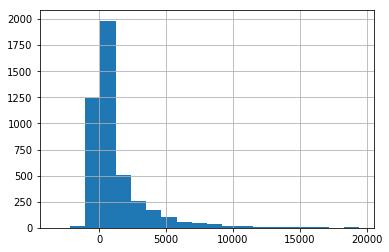

In [64]:
df[df.balance <20000].balance.hist(bins=20) # EDM 작업 > 탐색적 데이터 분석

In [103]:
df2 = df.iloc[:,:-1]
df22 = df2.drop(columns=['day','month'])
df22.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown


In [104]:
df_hot = pd.get_dummies(df22)

In [105]:
df_hot.head()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,59,0,226,1,-1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1


In [106]:
pca = PCA(n_components=2).fit(df_hot)

In [107]:
x_pca = pca.transform(df_hot) #주성분 2개 추출
km = KMeans(n_clusters=2).fit(x_pca) # 2개로 그룹화
p1 = km.predict(x_pca)

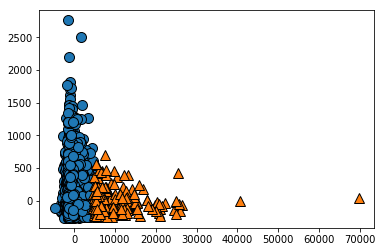

In [108]:
# 1. mean 
l = mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1], p1)

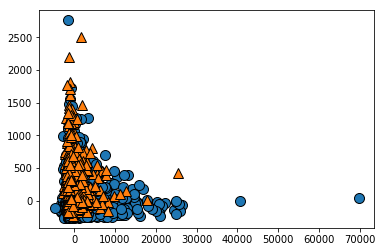

In [109]:
l = mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1], df.iloc[:,-1])

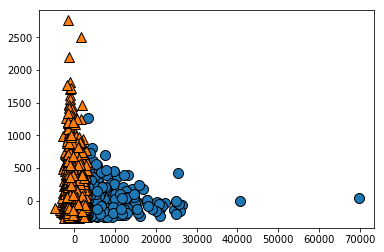

In [110]:
# 2. 병합군집
model1 = AgglomerativeClustering(n_clusters=2)
p2 = model1.fit_predict(x_pca)
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1], p2)

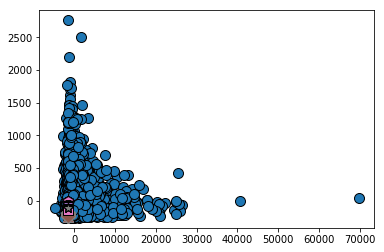

In [111]:
#3. DBSCAN
p3 = DBSCAN(eps=2, min_samples=5).fit_predict(x_pca)
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1], p3)

In [112]:
df_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 38 columns):
age                    4521 non-null int64
balance                4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
job_admin.             4521 non-null uint8
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_divorced       4521 non-null uint8
marital_married        4521 non-null uint8
marital_single         4521 non-n

In [113]:
# x,y 구분

X = df_hot
y = df.iloc[:,-1]
X.head(), y.head()

(   age  balance  duration  campaign  pdays  previous  job_admin.  \
 0   30     1787        79         1     -1         0           0   
 1   33     4789       220         1    339         4           0   
 2   35     1350       185         1    330         1           0   
 3   30     1476       199         4     -1         0           0   
 4   59        0       226         1     -1         0           0   
 
    job_blue-collar  job_entrepreneur  job_housemaid  ...  housing_yes  \
 0                0                 0              0  ...            0   
 1                0                 0              0  ...            1   
 2                0                 0              0  ...            1   
 3                0                 0              0  ...            1   
 4                1                 0              0  ...            1   
 
    loan_no  loan_yes  contact_cellular  contact_telephone  contact_unknown  \
 0        1         0                 1                  0 

In [114]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y) # test_size = 0.25, random_state=42

In [115]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3390, 38), (1131, 38), (3390,), (1131,))

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, SVR # SVM-C분류용, SVM-R회귀용
import mglearn
from sklearn.model_selection import train_test_split 

In [122]:
model = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)

In [123]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9162241887905604, 0.9062776304155614)

<BarContainer object of 38 artists>

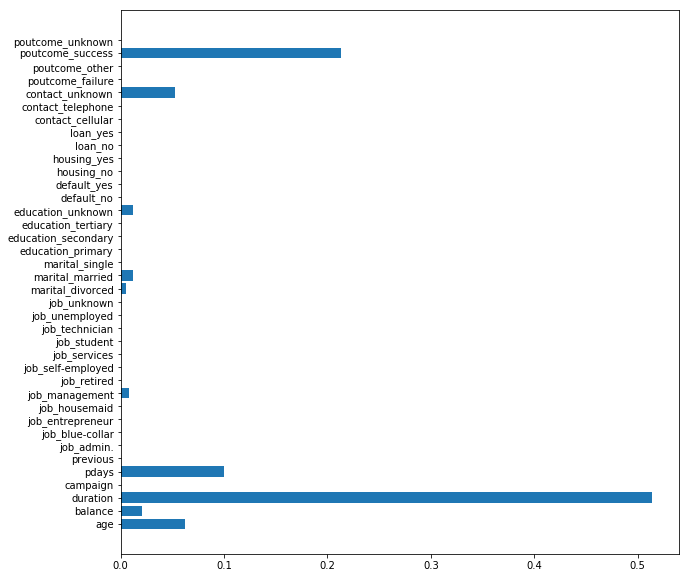

In [124]:
plt.figure(figsize=(10,10))
plt.barh(X_train.columns, model.feature_importances_)

In [125]:
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'
os.environ['PATH']

'C:\\Users\\wtime\\Anaconda3;C:\\Users\\wtime\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\wtime\\Anaconda3\\Library\\usr\\bin;C:\\Users\\wtime\\Anaconda3\\Library\\bin;C:\\Users\\wtime\\Anaconda3\\Scripts;C:\\Users\\wtime\\Anaconda3\\bin;C:\\Users\\wtime\\Anaconda3\\condabin;C:\\Users\\wtime\\Anaconda3;C:\\Users\\wtime\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\wtime\\Anaconda3\\Library\\usr\\bin;C:\\Users\\wtime\\Anaconda3\\Library\\bin;C:\\Users\\wtime\\Anaconda3\\Scripts;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Windows\\System32\\OpenSSH\\;C:\\Program Files\\Git\\cmd;C:\\Users\\wtime\\AppData\\Local\\Microsoft\\WindowsApps;;C:\\Program Files (x86)\\Graphviz2.38\\bin\\;C:\\Program Files (x86)\\Graphviz2.38\\bin\\;C:\\Program Files (x86)\\Graphviz2.38\\bin\\'

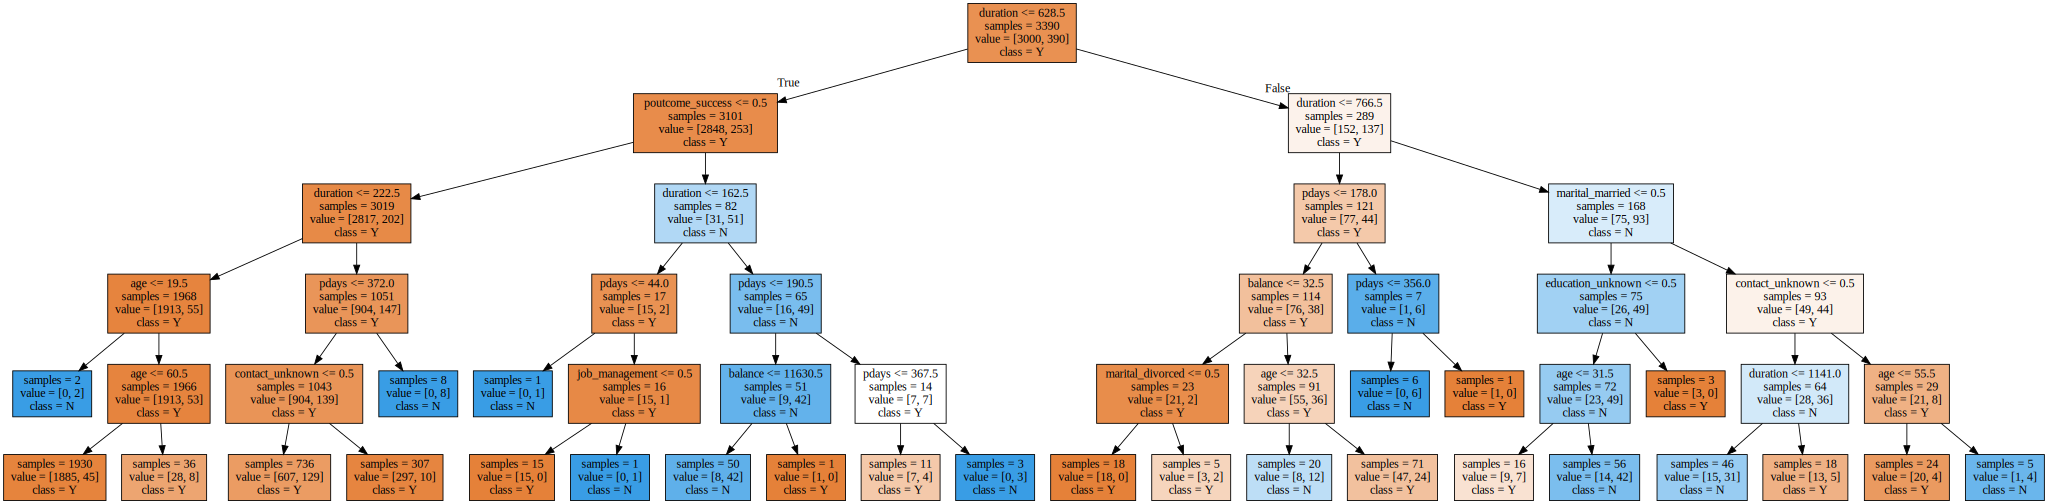

In [126]:
export_graphviz(model, out_file='bank.dot', class_names=['Y','N'], feature_names=X.columns, impurity=False, filled=True)
with open('bank.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)